# Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_ds = pd.read_csv("heart.csv")
heart_ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Statistike

### Korelacija sa HeartDisease ficerom

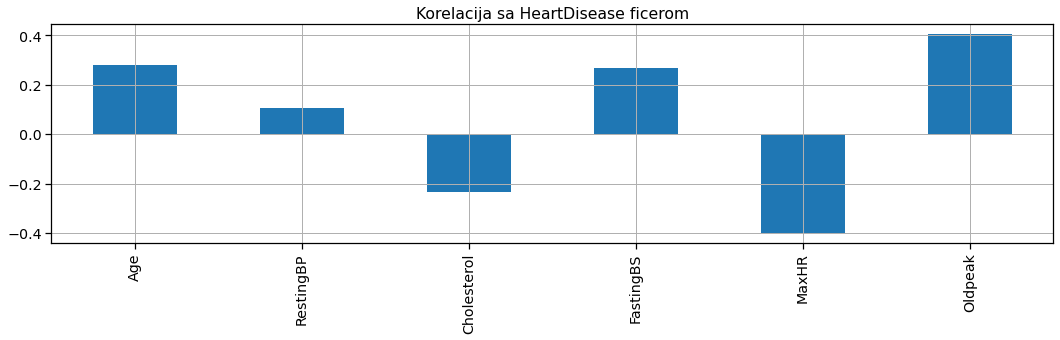

In [86]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
heart_ds.drop('HeartDisease', axis=1).corrwith(heart_ds.HeartDisease).plot(kind='bar', grid=True, figsize=(15, 5), 
                                                   title="Korelacija sa HeartDisease ficerom")
plt.tight_layout()

### Analiza podataka o uzrastu

In [ ]:
# Let's check 10 ages and their count

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart_ds.Age.value_counts()[:45].index,y=heart_ds.Age.value_counts()[:45].values)
plt.tight_layout()

minAge=min(heart_ds.Age)
maxAge=max(heart_ds.Age)
meanAge=heart_ds.Age.mean()
print('Min vrednost godina :',minAge)
print('Max vrednost godina :',maxAge)
print('Srednja vrednost godina :',meanAge)

In [17]:
Young = heart_ds[(heart_ds.Age>=28)&(heart_ds.Age<40)]
Middle = heart_ds[(heart_ds.Age>=40)&(heart_ds.Age<60)]
Elder = heart_ds[(heart_ds.Age>60)]

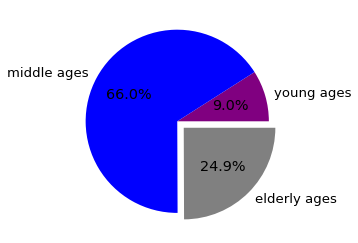

In [24]:
colors = ['purple','blue','gray']
explode = [0,0,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

<AxesSubplot:title={'center':'Verovatnoca pojave srcanih bolessti u odnosu na godine starosti i pol'}, xlabel='Age,Sex'>

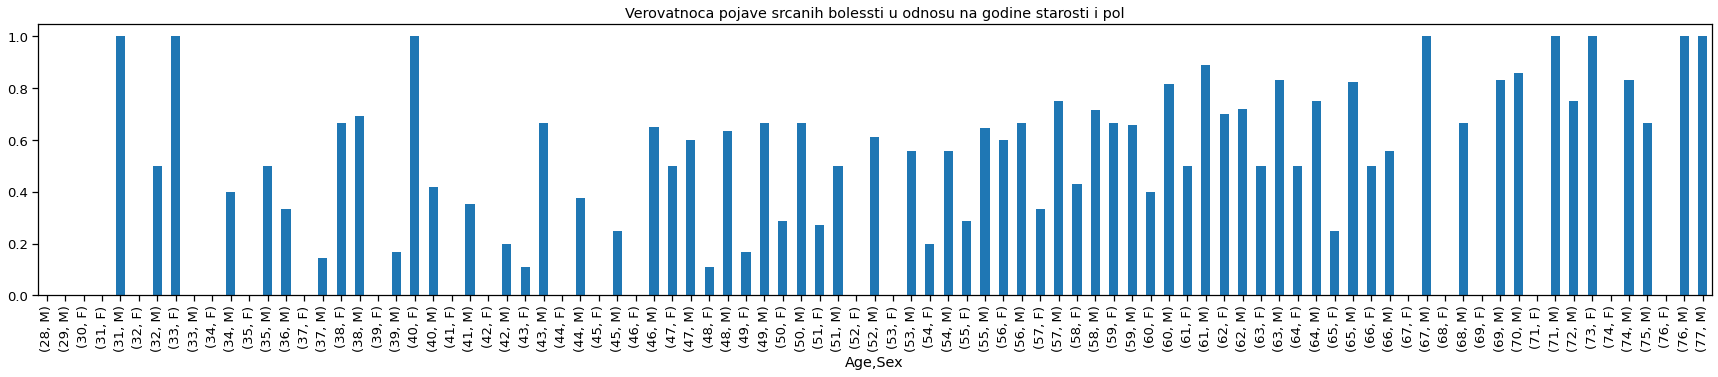

In [81]:
categores = ['Age', 'Sex']
#create dataframe
df_marks = pd.DataFrame(heart_ds)
#sort dataframe
sorted_df = df_marks.sort_values(by='Age')
plt.figure(figsize=(30,5))
plt.xlim(0,20000) 
plt.title('Verovatnoca pojave srcanih bolessti u odnosu na godine starosti i pol')
sorted_df.groupby(categores)['HeartDisease'].mean().plot.bar()

<AxesSubplot:title={'center':'Kako depresija utice na pojavu srcanih bolesti'}, xlabel='Oldpeak'>

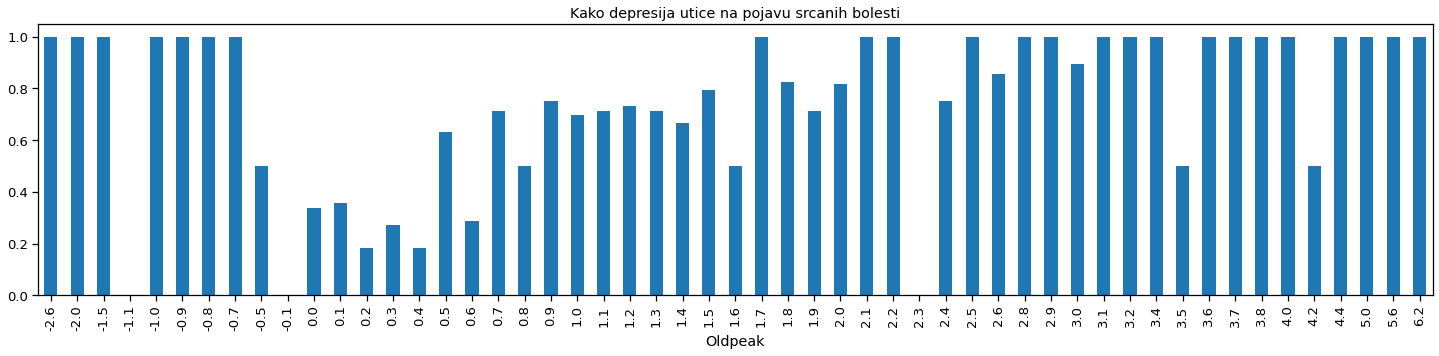

In [82]:
plt.figure(figsize=(25,5))
plt.xlim(0,20000) 
plt.title('Kako depresija utice na pojavu srcanih bolesti')
heart_ds.groupby('Oldpeak')['HeartDisease'].mean().plot.bar()

<AxesSubplot:title={'center':'Kako bol u grudima utice na pojavu srcanih bolesti'}, xlabel='ChestPainType'>

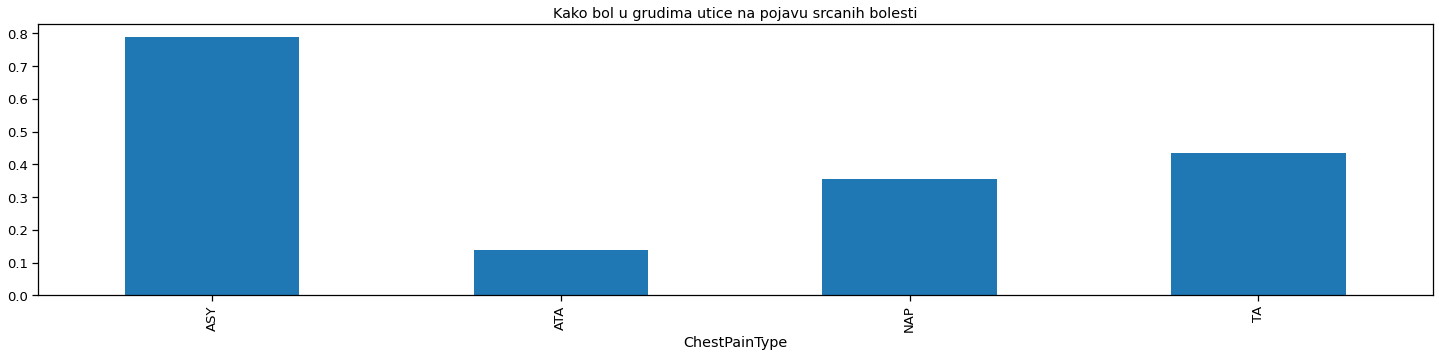

In [85]:
plt.figure(figsize=(25,5))
plt.xlim(0,20000) 
plt.title('Kako bol u grudima utice na pojavu srcanih bolesti')
heart_ds.groupby('ChestPainType')['HeartDisease'].mean().plot.bar()

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
categores = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for x in categores:
    heart_ds[x]= le.fit_transform(heart_ds[x])
    print(x, le.classes_)

Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
RestingECG ['LVH' 'Normal' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Down' 'Flat' 'Up']


<AxesSubplot:>

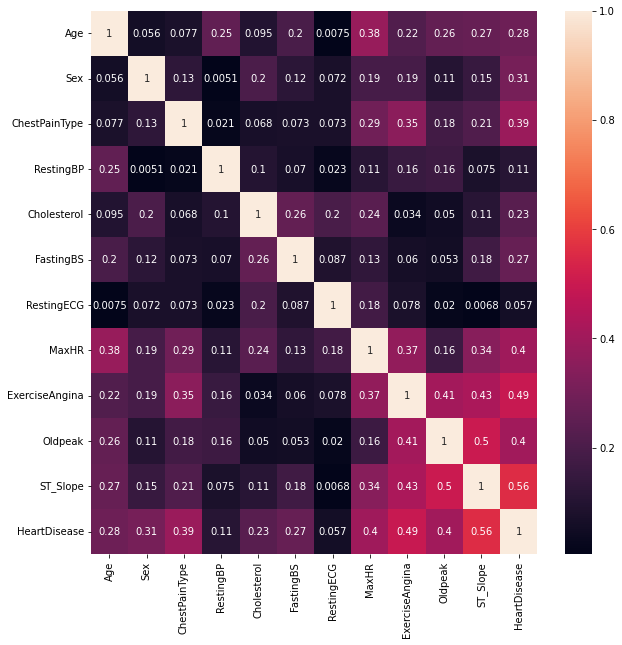

In [5]:
fig= plt.figure(figsize=(10,10))

sns.heatmap(heart_ds.corr().abs() , annot= True)

## Smanjenje dataseta

In [6]:
heart_ds.drop('RestingBP', inplace = True, axis = 1)
heart_ds.drop('RestingECG', inplace = True, axis = 1)

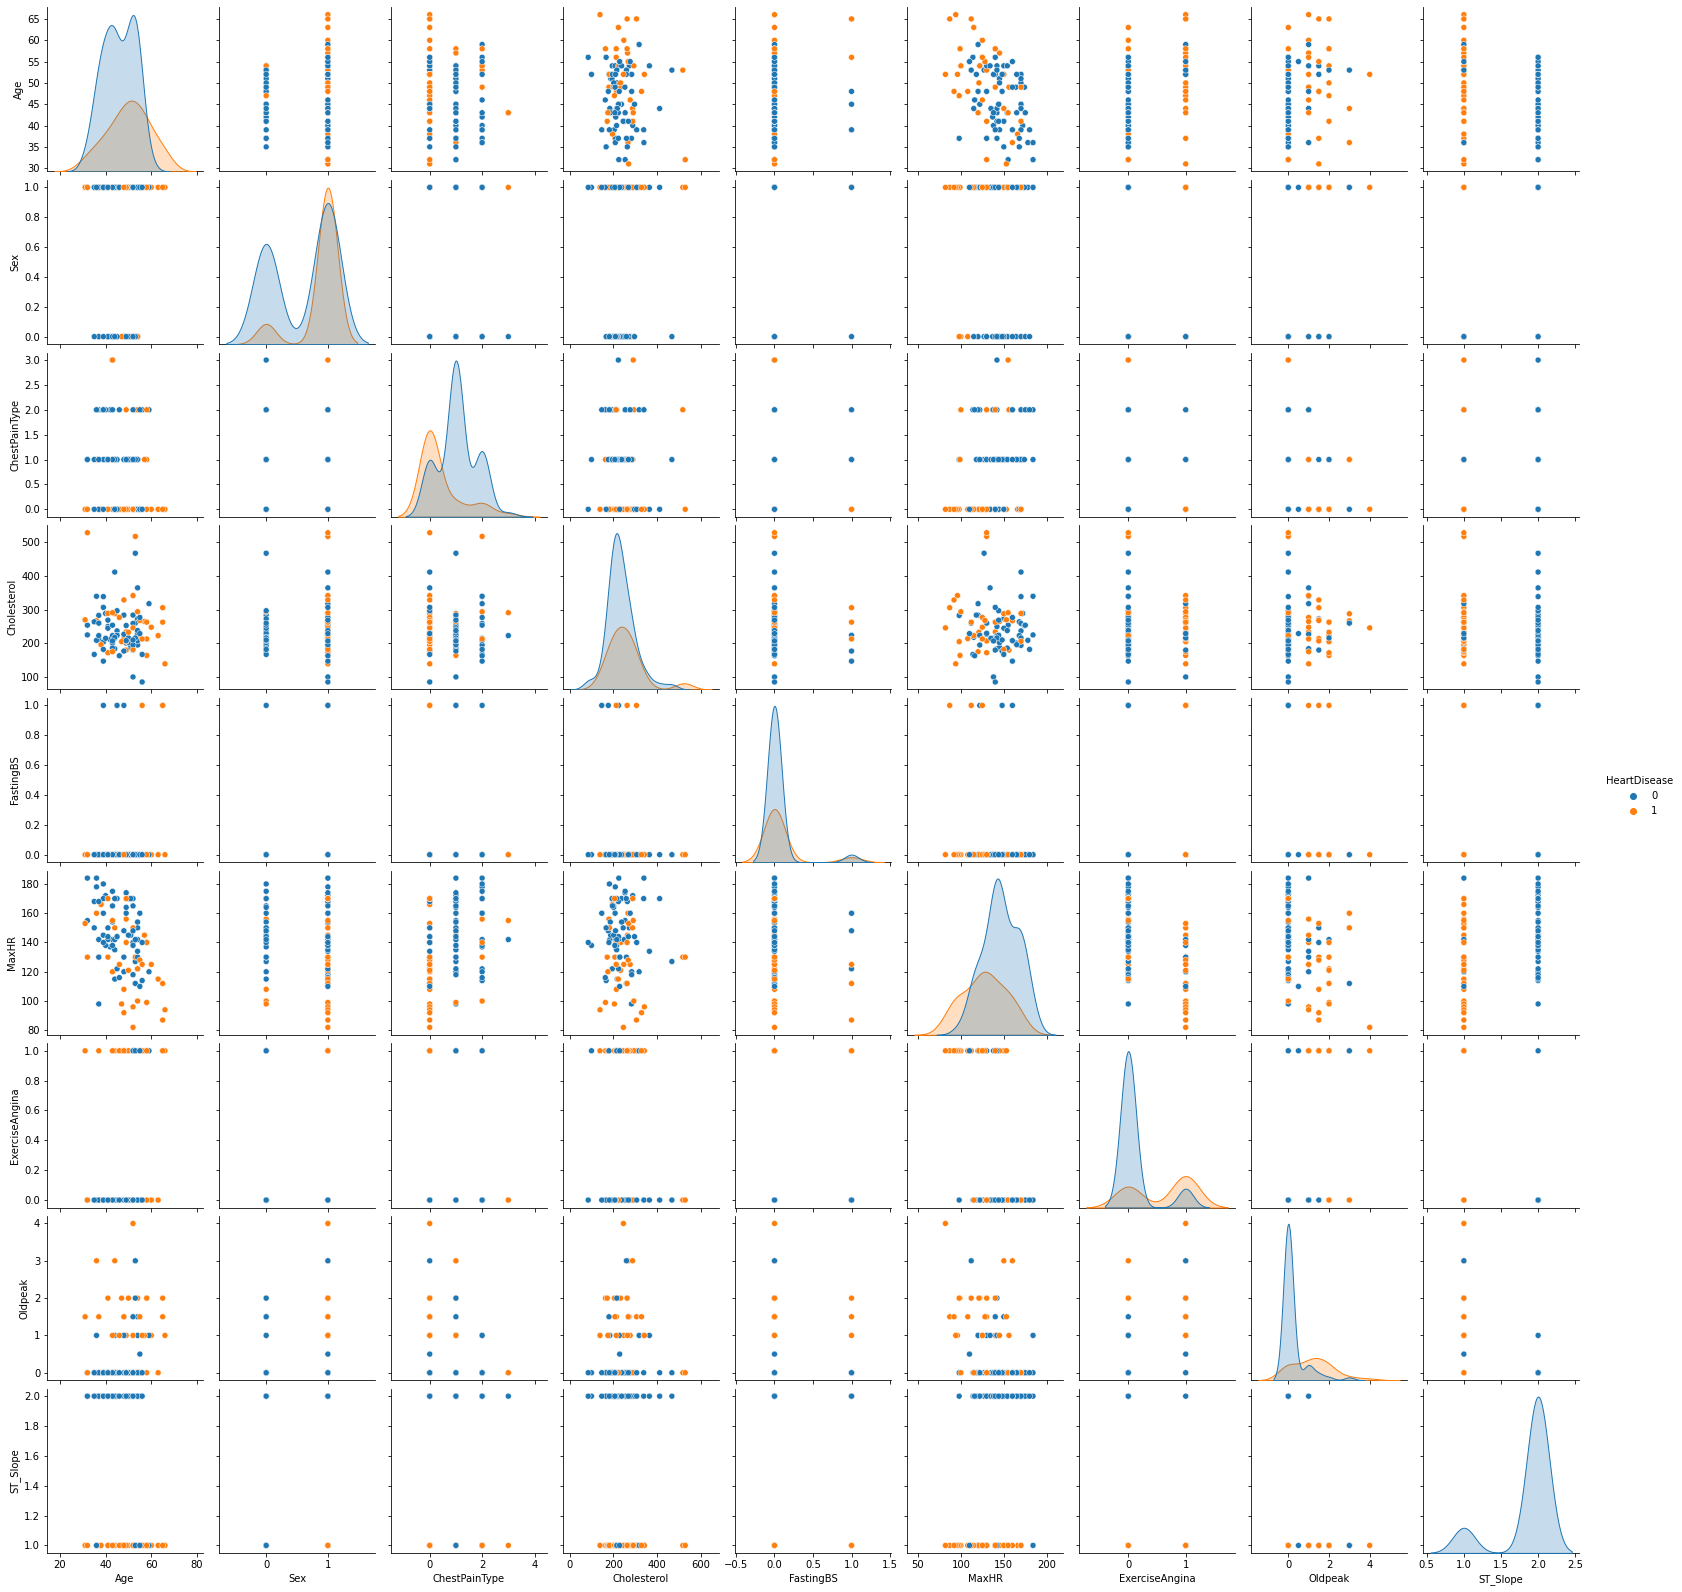

In [23]:
sns.pairplot(heart_ds.head(100),hue='HeartDisease')

## Modeli

### Podela na trening i test skupove

In [8]:
from sklearn import preprocessing

X_Train = heart_ds.drop("HeartDisease", axis=1).values
Y_Train = heart_ds["HeartDisease"].values

x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_Train, test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()

x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test) 

print("Trening skup",x_train.shape)
print("Test skup ",x_test.shape)

Trening skup (642, 9)
Test skup  (276, 9)


### Funkcije za vizuelizaciju

In [9]:
def printHistory(history_):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axes = axes.flatten()
    
    training_loss = history_.history["loss"]
    test_loss = history_.history["val_loss"]
    
    epoch_count = range(1, len(training_loss) + 1)

    axes[0].plot(epoch_count, training_loss, "r--")
    axes[0].plot(epoch_count, test_loss, "b-")
    axes[0].legend(["Training Loss", "Test Loss"])
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Loss")
    
    training_accuracy = history_.history["accuracy"]
    test_accuracy = history_.history["val_accuracy"]

    epoch_count = range(1, len(training_accuracy) + 1)
    
    axes[1].plot(epoch_count, training_accuracy, "r--")
    axes[1].plot(epoch_count, test_accuracy, "b-")
    axes[1].legend(["Training Accuracy", "Test Accuracy"])
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy Score")
    axes[1].set_title("Accuracy")
    plt.show();
    

### Treniranje modela

In [10]:
import tensorflow.keras as Keras
import array as arr


def GenerateModel(layers, loss, optimizer):
    
    model = Keras.Sequential(layers)
    if(layers[-1].activation.__name__ != 'sigmoid'):
        model.add(Dense(1, activation ='sigmoid'))
    
    model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
    
    return model

def GenerateDenseLayers(nodeArray, activation):
    layers = []
    
    for numberOfNodes in nodeArray:
        layers.append(Keras.layers.Dense(numberOfNodes, activation))
    
    return layers

def GenerateAndTrainModel(nodeArray, activation="relu", loss="binary_crossentropy", optimizer="rmsprop", epochs = 50, print=True):
    model = GenerateModel(GenerateDenseLayers(nodeArray, activation), loss, optimizer)
    history = model.fit(x_train,
     y_train,
     epochs=epochs,
     verbose=0,
     batch_size=10,
     validation_data=(x_test, y_test))
    if(print):
        printHistory(history)
    return [history.history["accuracy"][-1], history.history["val_accuracy"][-1]]

[18]


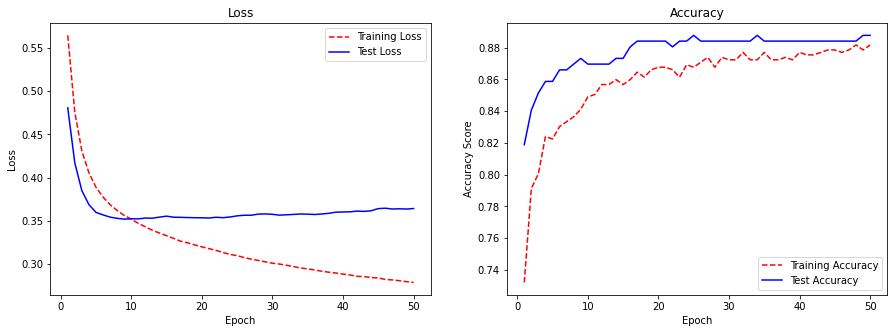

[30]


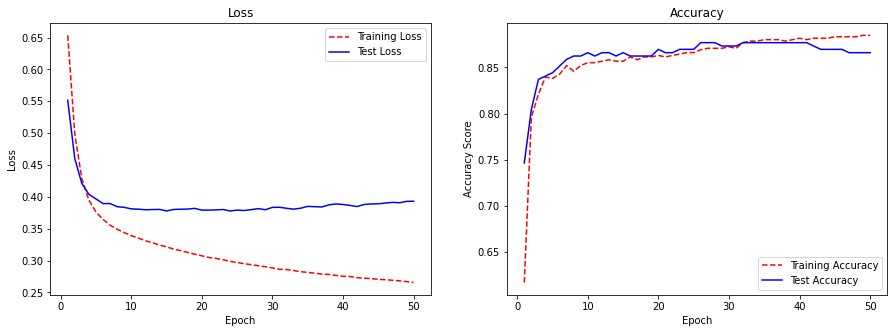

[60]


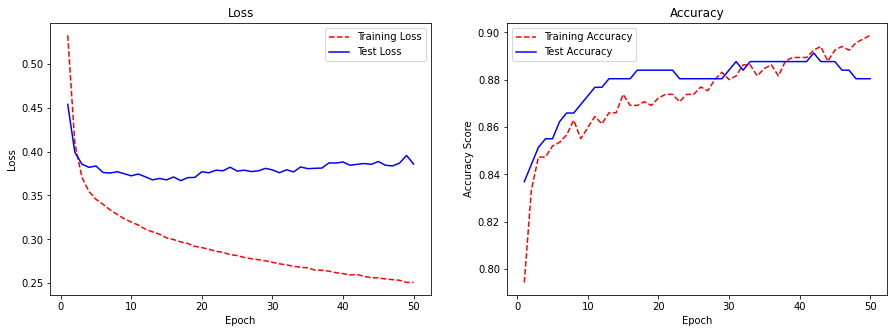

[18, 20]


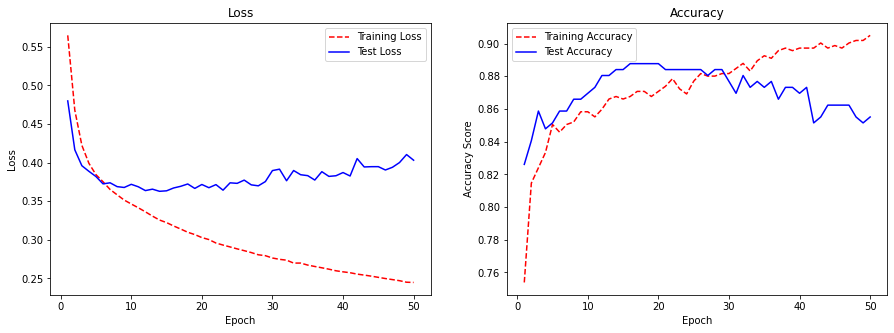

[18, 18, 18]


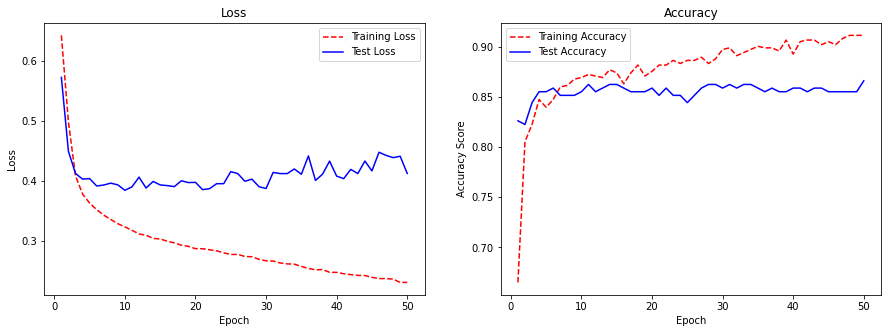

[18, 18, 18, 23]


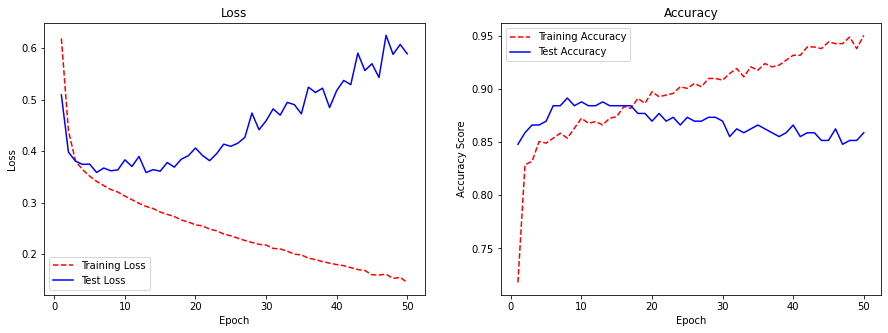

[40, 20, 40]


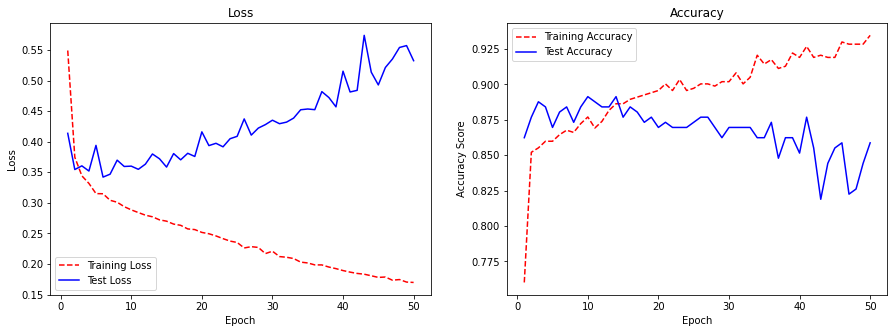

[10, 20, 30, 50]


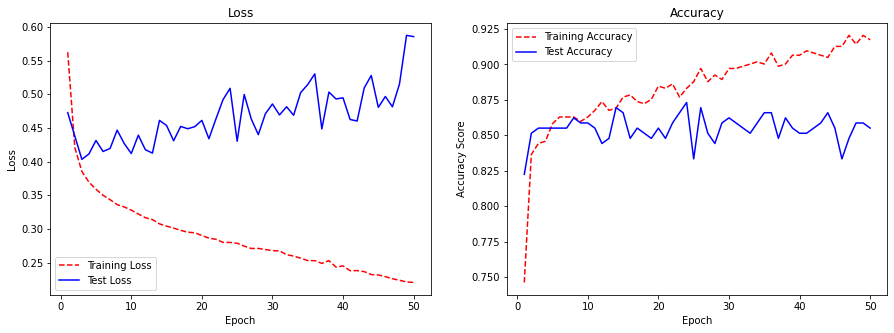

[50, 20, 40, 30]


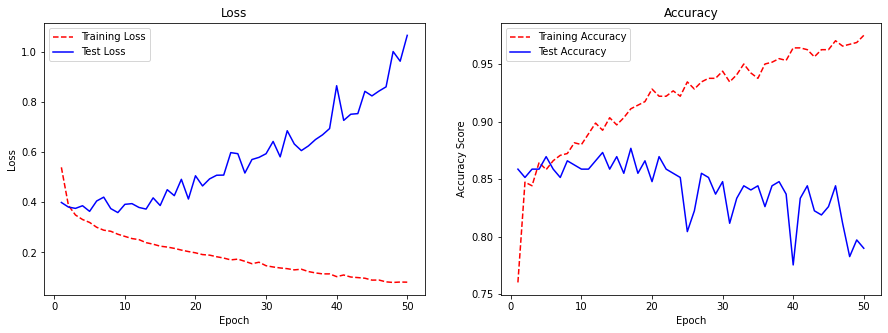

[20, 25, 25, 30, 35]


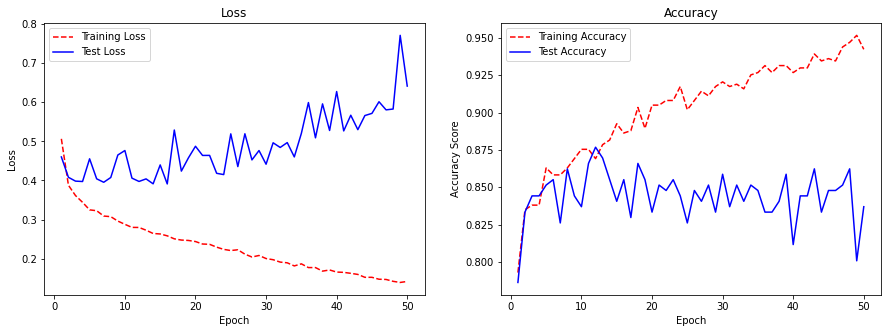

[[0.881619930267334, 0.8876811861991882], [0.8847352266311646, 0.8659420013427734], [0.8987538814544678, 0.8804348111152649], [0.9049844145774841, 0.8550724387168884], [0.9112149477005005, 0.8659420013427734], [0.9501557350158691, 0.8586956262588501], [0.9345794320106506, 0.8586956262588501], [0.9174454808235168, 0.8550724387168884], [0.9750778675079346, 0.7898550629615784], [0.9423676133155823, 0.8369565010070801]]


In [11]:
layersArray = [
    [18],
    [30],
    [60],
    [18,20],
    [18,18,18],
    [18,18,18,23],
    [40, 20, 40],
    [10, 20, 30, 50],
    [50, 20, 40, 30],
    [20, 25, 25, 30, 35]
]
scores = [];

for l in layersArray:
    print(l)
    score = GenerateAndTrainModel(l)
    scores.append(score)

print(scores)
# layers = [18,18,18,23]
# GenerateAndTrainModel(layers)

In [12]:
layers = [30]
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
resultTable = pd.DataFrame({'Optimizer': [], 'Train Acurracy': [], 'Test Acurracy': []})

for o in optimizers:
    score = GenerateAndTrainModel(layers, optimizer=o, print = False)
    resultTable = resultTable.append(pd.DataFrame({'Optimizer': [o], 'Train Acurracy': [score[0]], 'Test Acurracy': [score[1]]}), ignore_index=True)
    
resultTable = resultTable.sort_values(by = ['Train Acurracy'])
resultTable

,Optimizer,Train Acurracy,Test Acurracy
3,adadelta,0.468847,0.384058
4,adagrad,0.813084,0.836957
7,ftrl,0.834891,0.858696
0,sgd,0.870717,0.880435
5,adamax,0.870717,0.884058
2,adam,0.881620,0.880435
1,rmsprop,0.883178,0.876812
6,nadam,0.886293,0.876812


In [13]:
layers = [30]
activators = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
resultTable = pd.DataFrame({'Activation': [], 'Train Acurracy': [], 'Test Acurracy': []})

for a in activators:
    score = GenerateAndTrainModel(layers, optimizer='nadam', activation=a, print = False)
    resultTable = resultTable.append(pd.DataFrame({'Activation': [a], 'Train Acurracy': [score[0]], 'Test Acurracy': [score[1]]}), ignore_index=True)
    
resultTable = resultTable.sort_values(by = ['Train Acurracy'])
resultTable

,Activation,Train Acurracy,Test Acurracy
6,linear,0.848910,0.865942
5,hard_sigmoid,0.850467,0.862319
1,softplus,0.862928,0.887681
2,softsign,0.864486,0.876812
4,tanh,0.864486,0.873188
0,softmax,0.866044,0.884058
3,relu,0.892523,0.884058


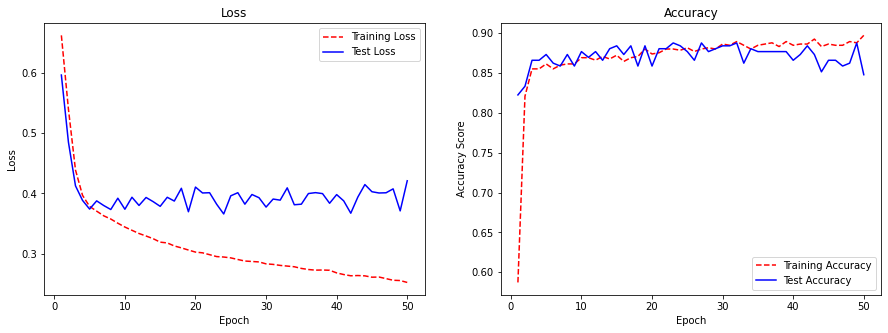

In [14]:
randomLayers = []
randomLayers.append(Keras.layers.Dense(20, 'relu'))
randomLayers.append(Keras.layers.Dense(20, 'softplus'))
randomLayers.append(Keras.layers.Dense(20, 'softmax'))
randomLayers.append(Keras.layers.Dense(20, 'linear'))
model = GenerateModel(randomLayers, "binary_crossentropy", "rmsprop")

history = model.fit(x_train,
     y_train,
     epochs=50,
     verbose=0,
     batch_size=10,
     validation_data=(x_test, y_test))

printHistory(history)

In [19]:
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
activators = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
layersArray = [
    [18],
    [30],
    [60],
]

permutations = [[i,j,k] for i in optimizers for j in activators for k in layersArray]
resultTable = pd.DataFrame({'Activation': [], 'Optimizer': [], 'Layers': [], 'Train Acurracy': [], 'Test Acurracy': []})
for p in permutations:
    score = GenerateAndTrainModel(p[2], optimizer=p[0], activation=p[1], print = False, epochs=20)
    resultTable = resultTable.append(pd.DataFrame({'Activation': [p[0]], 'Optimizer': [p[1]], 'Layers': [p[2]], 'Train Acurracy': [score[0]], 'Test Acurracy': [score[1]]}), ignore_index=True)
    



In [22]:
resultTable.sort_values(by="Train Acurracy", ascending=False)

,Activation,Optimizer,Layers,Train Acurracy,Test Acurracy
137,nadam,relu,[60],0.878505,0.880435
53,adam,relu,[60],0.878505,0.880435
32,rmsprop,relu,[60],0.872274,0.884058
136,nadam,relu,[30],0.872274,0.865942
52,adam,relu,[30],0.870717,0.876812
...,...,...,...,...,...
68,adadelta,softplus,[60],0.468847,0.394928
76,adadelta,tanh,[30],0.440810,0.405797
81,adadelta,linear,[18],0.426791,0.460145
80,adadelta,hard_sigmoid,[60],0.376947,0.384058
